# Project: Predicting Heart Disease with Classification Machine Learning Algorithms

# 1. Introduction

# Goal: 





    -To predict whether a patient should be diagnosed with Heart Disease. This is a binary outcome. 
    Positive (+) = 1, patient diagnosed with Heart Disease  
    Negative (-) = 0, patient not diagnosed with Heart Disease 

    -To experiment with various Classification Models & see which yields  greatest accuracy. 
    - Examine trends & correlations within our data
    - determine which features are important in determing Positive/Negative Heart Disease

# Features & Predictor:

Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X):

1. age (#)
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic (
4. (trestbps) resting blood pressure (#)
5. (chol) serum cholestoral in mg/dl  (#)
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restecg) resting electrocardiographic results(values 0,1,2)
8. (thalach) maximum heart rate achieved (#)
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no) 
10. (oldpeak) = ST depression induced by exercise relative to rest (#) 
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: upsloping , Value 2: flat , Value 3: downsloping )
12. (ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy 
13. (thal) maximum heart rate achieved - (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Wrangling

In [2]:
filePath = 'heartDisease.csv'

data = pd.read_csv(filePath)

data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41.0,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1


In [3]:
print("(Rows, columns): " + str(data.shape))
data.columns 

(Rows, columns): (303, 14)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
data.nunique(axis=0)# returns the number of unique values for each variable.

age          41
sex           2
cp            4
trestbps     49
chol        151
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,300.000000,303.000000,303.000000,303.000000,301.000000,303.000000,303.000000,302.00000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.300000,0.683168,0.966997,131.623762,246.581395,0.148515,0.528053,149.60596,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.074017,0.466011,1.032052,17.538143,51.844101,0.356198,0.525860,22.93209,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.25000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.50000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.00000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.00000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Display the Missing Values
print(data.isna().sum())

age         3
sex         0
cp          0
trestbps    0
chol        2
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
data = data.dropna()

In [8]:
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.238255,0.681208,0.959732,131.493289,246.442953,0.151007,0.530201,149.536913,0.328859,1.036913,1.399329,0.734899,2.312081,0.543624
std,9.068405,0.466792,1.033963,17.486550,52.002510,0.358658,0.526177,23.074473,0.470589,1.164275,0.618132,1.025035,0.614024,0.498931
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's see if theirs a good proportion between our positive and negative results. It appears we have a good balance between the two. 

In [10]:
data['target'].value_counts()

1    162
0    136
Name: target, dtype: int64

# 3. Exploratory Data Analysis

# Correlations

Correlation Matrix-
let's you see correlations between all variables. Within seconds, you can see whether something is positivly or negativly correlated with our predictor (target)

<AxesSubplot:>

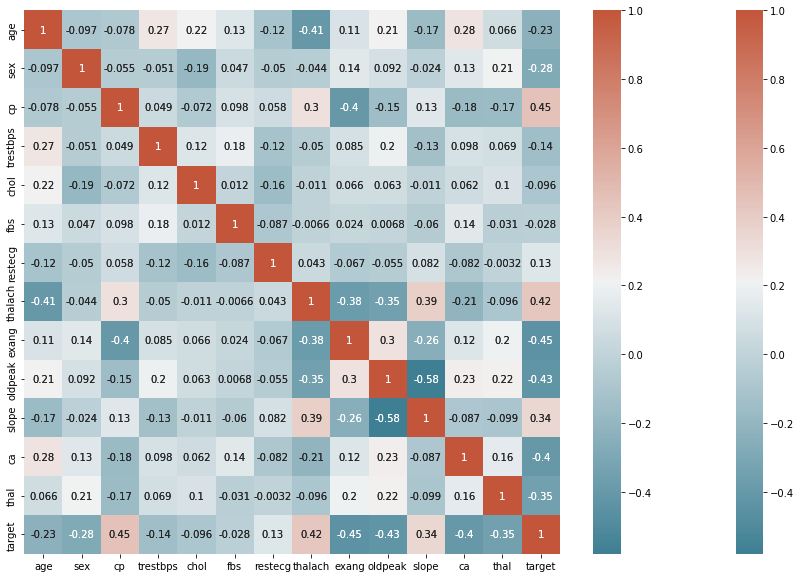

In [11]:
# calculate correlation matrix

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

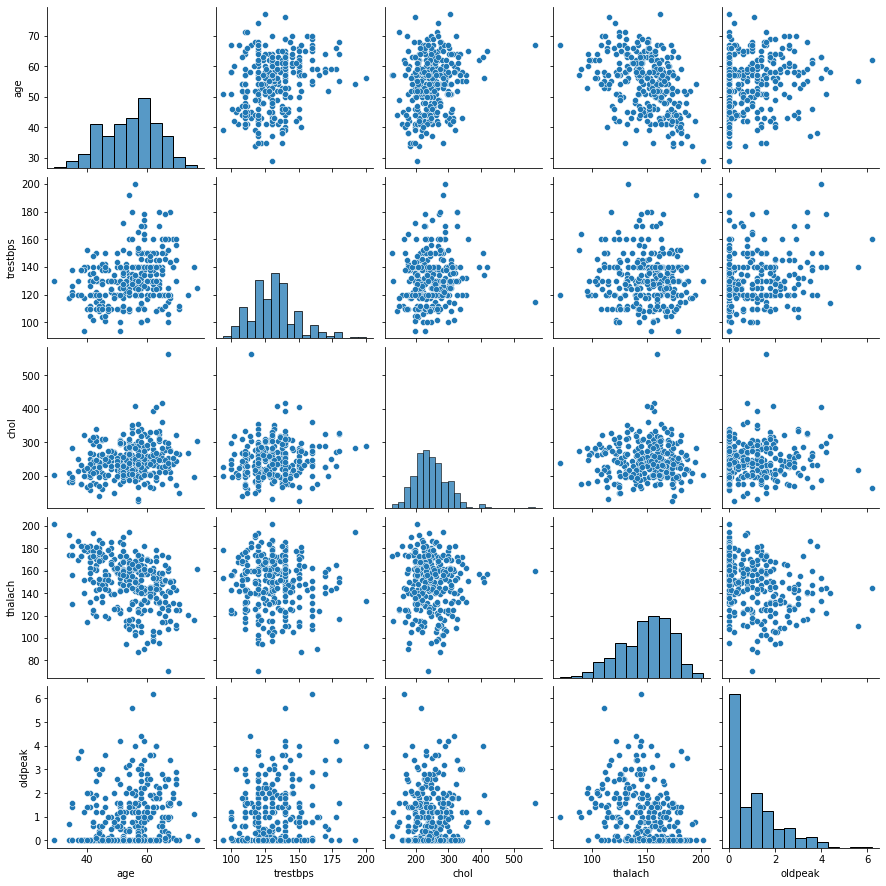

In [12]:
subData = data[['age','trestbps','chol','thalach','oldpeak',]]
sns.pairplot(subData)

We can see that the overall shape & distribution for negative & positive patients differ vastly. Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while negative patients are between 1 & 3. In addition, we dont see many differences between male & female target outcomes.  

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

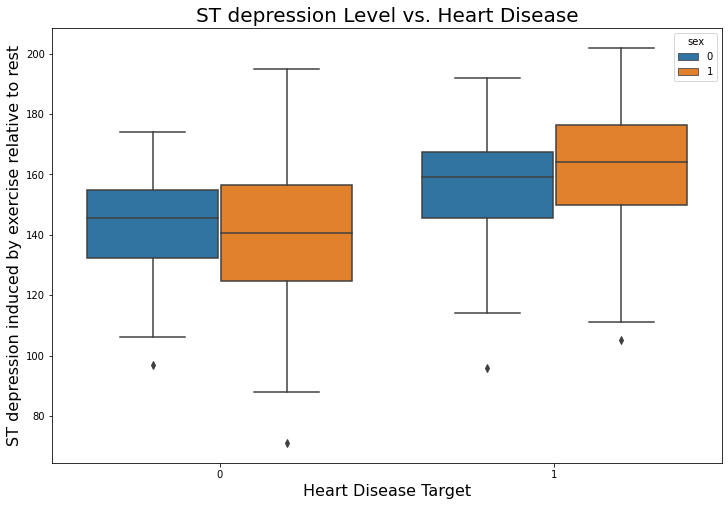

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

# Filtering data by positive & negative Heart Disease patient 

In [14]:
# Filtering data by positive Heart Disease patient 
pos_data = data[data['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0
mean,52.339506,0.561728,1.382716,129.197531,241.895062,0.141975,0.592593,158.462963,0.135802,0.580247,1.592593,0.358025,2.117284,1.0
std,9.516356,0.497714,0.953163,16.002655,53.841914,0.350107,0.505320,19.346510,0.343641,0.786283,0.595590,0.846016,0.464729,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,148.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.500000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,266.750000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


Filtering data by negative Heart Disease patient 

In [15]:
# Filtering data by negative Heart Disease patient 
neg_data = data[data['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.0
mean,56.500000,0.823529,0.455882,134.227941,251.860294,0.161765,0.455882,138.904412,0.558824,1.580882,1.169118,1.183824,2.544118,0.0
std,7.964737,0.382629,0.893330,18.800302,49.373283,0.369596,0.542527,22.704178,0.498363,1.302506,0.565098,1.041382,0.687105,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,218.000000,0.000000,0.000000,125.000000,0.000000,0.575000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,251.000000,0.000000,0.000000,141.500000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.250000,283.250000,0.000000,1.000000,156.250000,1.000000,2.500000,2.000000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [16]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))


(Positive Patients ST depression): 0.5802469135802468
(Negative Patients ST depression): 1.5808823529411764


In [17]:
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))

(Positive Patients thalach): 158.46296296296296
(Negative Patients thalach): 138.90441176470588


From comparing positive and negative patients we can see there are vast differenes in means for many of our Features. From examing the details, we can observe that positive patients experience heightened maximum heart rate achieved (thalach) average. In addition, positive patients exhibit about 1/3rd the amount of ST depression induced by exercise relative to rest (oldpeak). 


# 4. Machine Learning + Predictive Analytics

# Prepare Data for Modeling

Assign the 13 features to X, & the last column to our classification predictor, y

In [18]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Split: the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modeling /Training

We will now Train various Classification Models on the Training set & see which yields the highest accuracy.
We will compare the accuracy of Logistic Regression, K-NN, SVM, Naives Bayes Classifier, Decision Trees, Random Forest, and XGBoost. Note: these are all supervised learning models. 

Model 1: Logistic Regression


In [21]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        29

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



Model 2: K-NN (K-Nearest Neighbors)

In [22]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.77      0.93      0.84        29

    accuracy                           0.83        60
   macro avg       0.85      0.84      0.83        60
weighted avg       0.85      0.83      0.83        60



Model 3: Random Forest


In [23]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        31
           1       0.78      0.86      0.82        29

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



From comparing the 3 models, we can conclude that Model 3: Random Forest yields the highest accuracy. With an accuracy of 80%.


We have precision, recall, f1-score and support:

Precision : be "how many are correctly classified among that class"

Recall : "how many of this class you find over the whole number of element of this class" 

F1-score : harmonic mean of precision and recall values. 
           F1 score reaches its best value at 1 and worst value at 0. 
           F1 Score = 2 x ((precision x recall) / (precision + recall))
 
Support:  # of samples of the true response that lie in that class.




# Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[24  7]
 [ 4 25]]


0.8166666666666667

# Feature Importance

Feature Importance provides a score that indicates how helpful each feature was in our model. 

The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is. 

In [25]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08914
Feature: 1, Score: 0.03009
Feature: 2, Score: 0.13760
Feature: 3, Score: 0.07962
Feature: 4, Score: 0.08806
Feature: 5, Score: 0.00810
Feature: 6, Score: 0.02278
Feature: 7, Score: 0.10151
Feature: 8, Score: 0.04157
Feature: 9, Score: 0.11527
Feature: 10, Score: 0.04166
Feature: 11, Score: 0.13377
Feature: 12, Score: 0.11084


<AxesSubplot:>

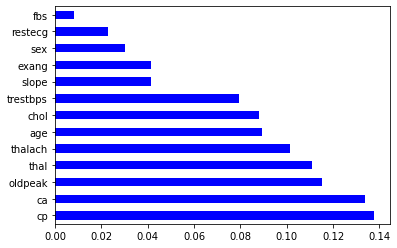

In [26]:
index= data.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

# Predictions

Scenario: A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm. 

He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110. 

In addition he has a serum cholestoral of 230 mg/dl. 

He is fasting blood sugar > 120 mg/dl. 

He has a resting electrocardiographic result of 1. 

The patients maximum heart rate achieved is 140.

Also, he was exercise induced angina.

His ST depression induced by exercise relative to rest value was 2.2.

The slope of the peak exercise ST segment is flat. 

He has no major vessels colored by fluoroscopy,
and in addition his maximum heart rate achieved is a reversable defect.

Based on this information, can you classify this patient with Heart Disease?


In [27]:
print(model6.predict(sc.transform([[80,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


Yes! Our machine learning algorithm has classified this patient with Heart Disease. Now we can properly diagnose him, & get him the help he needs to recover. By diagnosing him early, we may prevent worse symtoms from arising later. 

Predicting the Test set results:

First value represents our predicted value,
Second value represents our actual value.

If the values match, then we predicted correctly.
We can see that our results are very accurate!

In [28]:
y_pred = model6.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


# Conclusions

1. Our Random Forest algorithm yields the highest accuracy, 80%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

2. Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak). 

3. Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symtoms from arising later.